## Estadística Aplicada
Sesión 14

17 Octubre

Francisco Javier Chávez Hernández  2034204

Gpo 044

In [143]:
#librerias basicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [176]:
#especializadas
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

#ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [145]:
## definir tamaño de la grafica
plt.rcParams['figure.figsize']=(10,6)

In [146]:
igae_deses=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/igae_deses.csv')

* ARIMA(p, I, q) = series sin componente estacional
* SARIMA= series con componente estacional

In [147]:
igae_deses.head()

,meses,IGAE_DESES
0,1993/01,56.282290
1,1993/02,57.708594
2,1993/03,57.825254
3,1993/04,57.179522
4,1993/05,57.895451


In [148]:
#formato fecha
igae_deses['meses']=pd.to_datetime(igae_deses['meses'], format='%Y/%m')


In [149]:
#que sea el index
igae_deses.set_index('meses')

,IGAE_DESES
meses,
1993-01-01,56.282290
1993-02-01,57.708594
1993-03-01,57.825254
1993-04-01,57.179522
1993-05-01,57.895451
...,...
2023-03-01,102.032776
2023-04-01,102.735045
2023-05-01,102.924688


In [150]:
#frecuencia asignada
#igae_deses=igae_deses['IGAE_DESES'].asfreq('MS')

Text(0, 0.5, 'Indice')

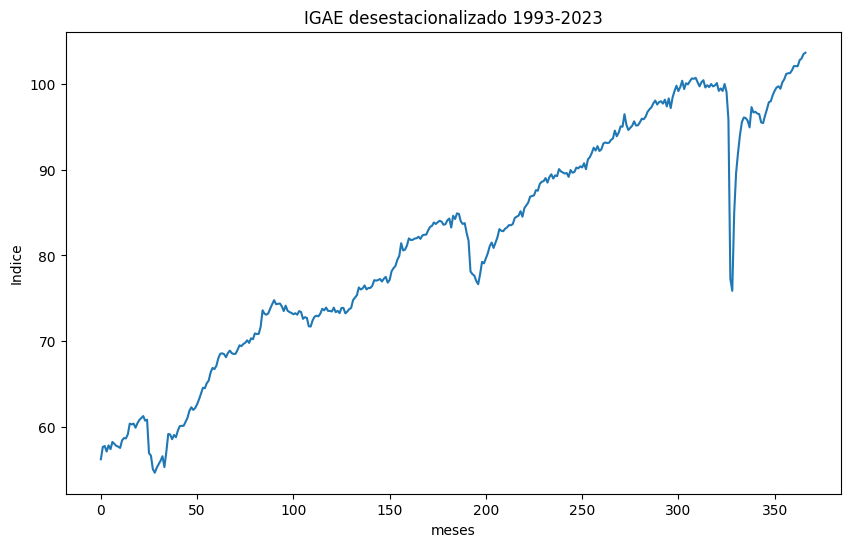

In [151]:
#graficar
igae_deses['IGAE_DESES'].plot()
plt.title('IGAE desestacionalizado 1993-2023')
plt.xlabel('meses')
plt.ylabel('Indice')

El igae se parece a una caminata aleatoria con deriva positiva y por tanto sospechamos que es un proceso no estacionario

In [152]:
#Dickey-Fuller Aumentada
# H_0: No estacionario
#H_a: Estacionario
dfa_test=adfuller(igae_deses['IGAE_DESES'])
dfa_test

(-1.0481779348666853,
 0.7352896929912618,
 2,
 364,
 {'1%': -3.4484434475193777,
  '5%': -2.869513170510808,
  '10%': -2.571017574266393},
 1147.2710040898037)

In [153]:
pvalue1=dfa_test[1]
pvalue1.round(2)

0.74

Con un p-value de 0.74 No rechazamos H_0, el igae es una serie no estacionaria.

In [154]:
#Como la series es no estacionaria debemos aplicar primeras diferencias para hacerla estacionaria
igae_deses['igae_diff']=igae_deses['IGAE_DESES'].diff()

In [155]:
igae_deses

,meses,IGAE_DESES,igae_diff
0,1993-01-01,56.282290,NaN
1,1993-02-01,57.708594,1.426305
2,1993-03-01,57.825254,0.116660
3,1993-04-01,57.179522,-0.645732
4,1993-05-01,57.895451,0.715929
...,...,...,...
362,2023-03-01,102.032776,-0.011138
363,2023-04-01,102.735045,0.702268
364,2023-05-01,102.924688,0.189644
365,2023-06-01,103.438087,0.513399


In [156]:
dfa_test1=adfuller(igae_deses['igae_diff'].dropna())
pvalue2=dfa_test1[1]
pvalue2.round(3)

0.0

Como el pvalue=0 rechazamos H_0, significa que igae_diff es un proceso estacionario

* IGAE= Intefrado orden uno I(1)
* igae_dife=Integrado orden cero I(0)


<Axes: >

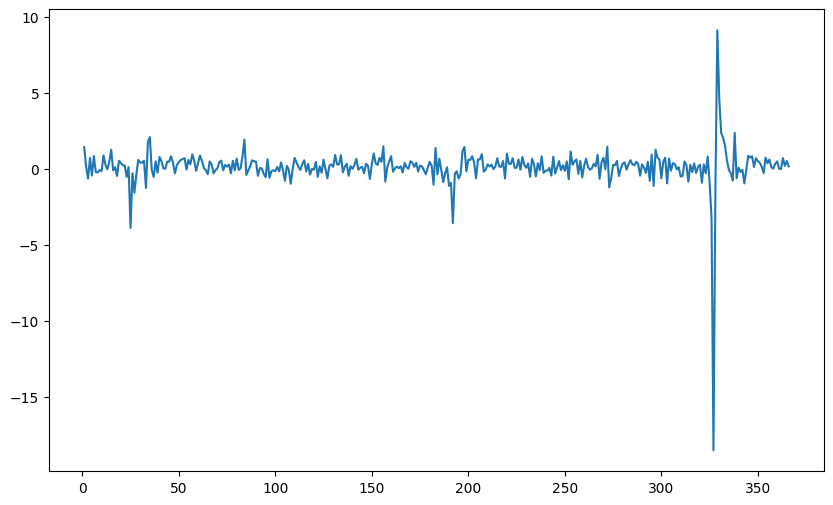

In [157]:
igae_deses['igae_diff'].plot()

(0.5, 40.0)

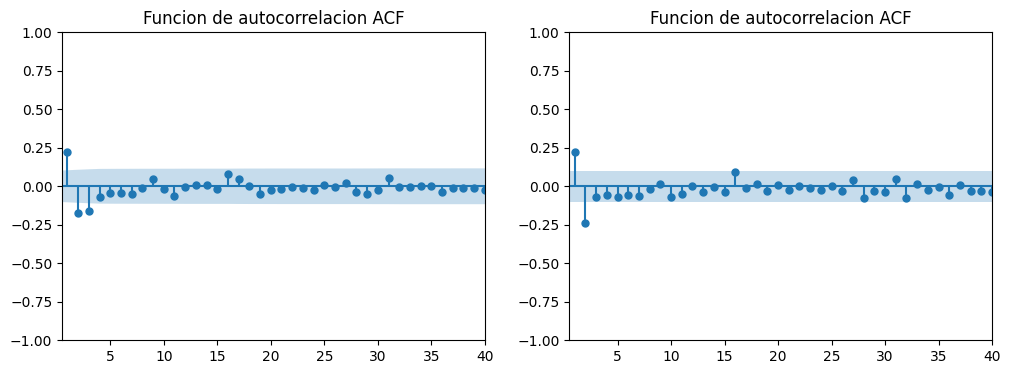

In [177]:
#igae_diff es estacionario
# que tipo de proceso es?
# funcion de autocorrelacion y funcion de autocorecuperacion parcial
ig,ax=plt.subplots(1,2,figsize=(12,4))
#subgrafica 1
plot_acf(igae_deses['igae_diff'].dropna(),zero=False, lags=40, ax=ax[0], title=('Funcion de autocorrelacion ACF'))
ax[0].set_ylim(-1,1)
ax[0].set_xlim(0.5,40)

#subgrafica 2
plot_pacf(igae_deses['igae_diff'].dropna(),zero=False, lags=40, ax=ax[1], title=('Funcion de autocorrelacion ACF'))
ax[1].set_ylim(-1,1)
ax[1].set_xlim(0.5,40)

Yo sospecho que igae_diff es un AR(1)=ARMA(1,0)=ARIMA(1,0,0)
ARIMA(p, I, q)

In [180]:
#metodo alternativo
modelo_prueba=ARIMA(igae_deses['igae_diff'].dropna(),order=(1,0,0))
resultadop=modelo_prueba.fit()
print(resultadop.summary())

                               SARIMAX Results                                
Dep. Variable:              igae_diff   No. Observations:                  366
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -602.265
Date:                Tue, 17 Oct 2023   AIC                           1210.530
Time:                        12:24:29   BIC                           1222.238
Sample:                             0   HQIC                          1215.182
                                - 366                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1303      0.118      1.100      0.271      -0.102       0.363
ar.L1          0.2219      0.027      8.070      0.000       0.168       0.276
sigma2         1.5731      0.021     74.742      0.0

C:\Users\javie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Este modelo nos dice que la ecuación de igae_diff:
$$Y_t= 0.2219 Y_{t-1} + \varepsilon_t $$

In [181]:
#suponemos que es un AR(2)#metodo alternativo
modelo_prueba2=ARIMA(igae_deses['igae_diff'].dropna(),order=(2,0,0))
resultadop2=modelo_prueba2.fit()
print(resultadop2.summary())

                               SARIMAX Results                                
Dep. Variable:              igae_diff   No. Observations:                  366
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -591.689
Date:                Tue, 17 Oct 2023   AIC                           1191.379
Time:                        12:30:51   BIC                           1206.989
Sample:                             0   HQIC                          1197.582
                                - 366                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1292      0.110      1.179      0.238      -0.085       0.344
ar.L1          0.2747      0.027     10.270      0.000       0.222       0.327
ar.L2         -0.2367      0.017    -14.275      0.0

C:\Users\javie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Este modelo nos dice que la ecuación de igae_diff:
$$Y_t= 0.2747 Y_{t-1} -0.2367 Y_{t-2} +\varepsilon_t $$

In [ ]:
#vamos a estimar varios modelos y guardar el AIC BIC
ic={}
for ar in range(7):
    for ma in range(7):
        print(f"AR: {ar}, MA: {ma}")
        modelo=ARIMA(igae_deses['igae_diff'].dropna(),order=(ar,0,ma))
        resultado=modelo.fit()
        ic[(ar,ma)]=[resultado.aic, resultado.bic]

ic=pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index=ic.index.set_names(["AR", "MA"])

In [184]:
ic.sort_values('AIC',ascending=True).head(1)

,,AIC,BIC
AR,MA,,
3,1,1183.372563,1206.788363


* igae_diff es un ARMA (3,1)=ARIMA(3,0,1)
* Igae ARIMA(3,1,1)